## 爬虫读取2345天气网2019年上海的天气，并保存为csv文件

In [1]:
months = []
for year in (2019, ):
    for month in range(12):
        months.append('%d%02d'%(year, month+1))
months

['201901',
 '201902',
 '201903',
 '201904',
 '201905',
 '201906',
 '201907',
 '201908',
 '201909',
 '201910',
 '201911',
 '201912']

In [2]:
todo_urls = [
    f"http://tianqi.2345.com/t/wea_history/js/{month}/58362_{month}.js"
    for month in months
]

In [3]:
todo_urls

['http://tianqi.2345.com/t/wea_history/js/201901/58362_201901.js',
 'http://tianqi.2345.com/t/wea_history/js/201902/58362_201902.js',
 'http://tianqi.2345.com/t/wea_history/js/201903/58362_201903.js',
 'http://tianqi.2345.com/t/wea_history/js/201904/58362_201904.js',
 'http://tianqi.2345.com/t/wea_history/js/201905/58362_201905.js',
 'http://tianqi.2345.com/t/wea_history/js/201906/58362_201906.js',
 'http://tianqi.2345.com/t/wea_history/js/201907/58362_201907.js',
 'http://tianqi.2345.com/t/wea_history/js/201908/58362_201908.js',
 'http://tianqi.2345.com/t/wea_history/js/201909/58362_201909.js',
 'http://tianqi.2345.com/t/wea_history/js/201910/58362_201910.js',
 'http://tianqi.2345.com/t/wea_history/js/201911/58362_201911.js',
 'http://tianqi.2345.com/t/wea_history/js/201912/58362_201912.js']

In [4]:
import requests

In [5]:
datas = []

In [6]:
for url in todo_urls:
    r = requests.get(url)
    if r.status_code != 200:
        raise Exception()
    # 去除javascript前后的字符串，达到一个js格式的JSON
    data = r.text.lstrip("var weather_str=").rstrip(";")
    datas.append(data)

In [7]:
datas[0]

"{city:'上海',tqInfo:[{ymd:'2019-01-01',bWendu:'6℃',yWendu:'3℃',tianqi:'阴~多云',fengxiang:'西北风',fengli:'3级',aqi:'39',aqiInfo:'优',aqiLevel:'1'},{ymd:'2019-01-02',bWendu:'8℃',yWendu:'4℃',tianqi:'阴~多云',fengxiang:'东北风',fengli:'2级',aqi:'86',aqiInfo:'良',aqiLevel:'2'},{ymd:'2019-01-03',bWendu:'10℃',yWendu:'8℃',tianqi:'多云~小雨',fengxiang:'东北风',fengli:'2级',aqi:'71',aqiInfo:'良',aqiLevel:'2'},{ymd:'2019-01-04',bWendu:'10℃',yWendu:'8℃',tianqi:'小雨',fengxiang:'东南风',fengli:'2级',aqi:'33',aqiInfo:'优',aqiLevel:'1'},{ymd:'2019-01-05',bWendu:'10℃',yWendu:'5℃',tianqi:'小雨',fengxiang:'西北风',fengli:'2级',aqi:'46',aqiInfo:'优',aqiLevel:'1'},{ymd:'2019-01-06',bWendu:'8℃',yWendu:'5℃',tianqi:'阴~多云',fengxiang:'东北风',fengli:'2级',aqi:'43',aqiInfo:'优',aqiLevel:'1'},{ymd:'2019-01-07',bWendu:'8℃',yWendu:'6℃',tianqi:'小雨~阴',fengxiang:'东北风',fengli:'2级',aqi:'41',aqiInfo:'优',aqiLevel:'1'},{ymd:'2019-01-08',bWendu:'8℃',yWendu:'5℃',tianqi:'多云~阴',fengxiang:'东北风',fengli:'3级',aqi:'73',aqiInfo:'良',aqiLevel:'2'},{ymd:'2019-01-09',bWendu:'7℃

In [8]:
import demjson

In [10]:
demjson.decode(datas[0])

{'city': '上海',
 'tqInfo': [{'ymd': '2019-01-01',
   'bWendu': '6℃',
   'yWendu': '3℃',
   'tianqi': '阴~多云',
   'fengxiang': '西北风',
   'fengli': '3级',
   'aqi': '39',
   'aqiInfo': '优',
   'aqiLevel': '1'},
  {'ymd': '2019-01-02',
   'bWendu': '8℃',
   'yWendu': '4℃',
   'tianqi': '阴~多云',
   'fengxiang': '东北风',
   'fengli': '2级',
   'aqi': '86',
   'aqiInfo': '良',
   'aqiLevel': '2'},
  {'ymd': '2019-01-03',
   'bWendu': '10℃',
   'yWendu': '8℃',
   'tianqi': '多云~小雨',
   'fengxiang': '东北风',
   'fengli': '2级',
   'aqi': '71',
   'aqiInfo': '良',
   'aqiLevel': '2'},
  {'ymd': '2019-01-04',
   'bWendu': '10℃',
   'yWendu': '8℃',
   'tianqi': '小雨',
   'fengxiang': '东南风',
   'fengli': '2级',
   'aqi': '33',
   'aqiInfo': '优',
   'aqiLevel': '1'},
  {'ymd': '2019-01-05',
   'bWendu': '10℃',
   'yWendu': '5℃',
   'tianqi': '小雨',
   'fengxiang': '西北风',
   'fengli': '2级',
   'aqi': '46',
   'aqiInfo': '优',
   'aqiLevel': '1'},
  {'ymd': '2019-01-06',
   'bWendu': '8℃',
   'yWendu': '5℃',
   'tian

In [12]:
tqInfos = demjson.decode(datas[0])['tqInfo']

In [13]:
tqInfos

[{'ymd': '2019-01-01',
  'bWendu': '6℃',
  'yWendu': '3℃',
  'tianqi': '阴~多云',
  'fengxiang': '西北风',
  'fengli': '3级',
  'aqi': '39',
  'aqiInfo': '优',
  'aqiLevel': '1'},
 {'ymd': '2019-01-02',
  'bWendu': '8℃',
  'yWendu': '4℃',
  'tianqi': '阴~多云',
  'fengxiang': '东北风',
  'fengli': '2级',
  'aqi': '86',
  'aqiInfo': '良',
  'aqiLevel': '2'},
 {'ymd': '2019-01-03',
  'bWendu': '10℃',
  'yWendu': '8℃',
  'tianqi': '多云~小雨',
  'fengxiang': '东北风',
  'fengli': '2级',
  'aqi': '71',
  'aqiInfo': '良',
  'aqiLevel': '2'},
 {'ymd': '2019-01-04',
  'bWendu': '10℃',
  'yWendu': '8℃',
  'tianqi': '小雨',
  'fengxiang': '东南风',
  'fengli': '2级',
  'aqi': '33',
  'aqiInfo': '优',
  'aqiLevel': '1'},
 {'ymd': '2019-01-05',
  'bWendu': '10℃',
  'yWendu': '5℃',
  'tianqi': '小雨',
  'fengxiang': '西北风',
  'fengli': '2级',
  'aqi': '46',
  'aqiInfo': '优',
  'aqiLevel': '1'},
 {'ymd': '2019-01-06',
  'bWendu': '8℃',
  'yWendu': '5℃',
  'tianqi': '阴~多云',
  'fengxiang': '东北风',
  'fengli': '2级',
  'aqi': '43',
  'aqi

In [14]:
all_datas = []

In [15]:
for data in datas:
    tqInfos = demjson.decode(data)['tqInfo']
    all_datas.extend([x for x in tqInfos if len(x) > 0])

In [18]:
all_datas[0]

{'ymd': '2019-01-01',
 'bWendu': '6℃',
 'yWendu': '3℃',
 'tianqi': '阴~多云',
 'fengxiang': '西北风',
 'fengli': '3级',
 'aqi': '39',
 'aqiInfo': '优',
 'aqiLevel': '1'}

In [19]:
len(all_datas)

365

In [24]:
columns = list(all_datas[0].keys())

In [25]:
columns

['ymd',
 'bWendu',
 'yWendu',
 'tianqi',
 'fengxiang',
 'fengli',
 'aqi',
 'aqiInfo',
 'aqiLevel']

In [26]:
import csv

In [27]:
pwd

'c:\\Users\\Lei\\Documents\\GitHub\\ant-learn-pandas'

In [28]:
import os
work_dir = './shanghai_weather'
if not os.path.exists(work_dir):
    os.mkdir(work_dir)

import csv
with open(f'{work_dir}/shanghai_weather_2019.csv', 'w', newline = '', encoding = 'utf-8') as csv_file:
    writer = csv.writer(csv_file)
    writer.writerow(columns)
    for data in all_datas:
        writer.writerow([data[column] for column in columns])


## 读取CSC文件，查询上海市天气

In [2]:
import pandas as pd
df = pd.read_csv("./shanghai_weather/shanghai_weather_2019.csv")

In [3]:
df.set_index('ymd', inplace = True)

In [4]:
df.index

Index(['2019-01-01', '2019-01-02', '2019-01-03', '2019-01-04', '2019-01-05',
       '2019-01-06', '2019-01-07', '2019-01-08', '2019-01-09', '2019-01-10',
       ...
       '2019-12-22', '2019-12-23', '2019-12-24', '2019-12-25', '2019-12-26',
       '2019-12-27', '2019-12-28', '2019-12-29', '2019-12-30', '2019-12-31'],
      dtype='object', name='ymd', length=365)

In [8]:
df.columns

Index(['bWendu', 'yWendu', 'tianqi', 'fengxiang', 'fengli', 'aqi', 'aqiInfo',
       'aqiLevel'],
      dtype='object')

In [5]:
df['bWendu'] = df['bWendu'].str.replace('℃', '').astype('int32')
df['yWendu'] = df['yWendu'].str.replace('℃', '').astype('int32')

In [11]:
df.head()

,bWendu,yWendu,tianqi,fengxiang,fengli,aqi,aqiInfo,aqiLevel
ymd,,,,,,,,
2019-01-01,6,3,阴~多云,西北风,3级,39,优,1
2019-01-02,8,4,阴~多云,东北风,2级,86,良,2
2019-01-03,10,8,多云~小雨,东北风,2级,71,良,2
2019-01-04,10,8,小雨,东南风,2级,33,优,1
2019-01-05,10,5,小雨,西北风,2级,46,优,1


In [6]:
df.loc[df['tianqi'].str.contains('雨'), :]

,bWendu,yWendu,tianqi,fengxiang,fengli,aqi,aqiInfo,aqiLevel
ymd,,,,,,,,
2019-01-03,10,8,多云~小雨,东北风,2级,71,良,2
2019-01-04,10,8,小雨,东南风,2级,33,优,1
2019-01-05,10,5,小雨,西北风,2级,46,优,1
2019-01-07,8,6,小雨~阴,东北风,2级,41,优,1
2019-01-09,7,6,小雨,东北风,3级,37,优,1
...,...,...,...,...,...,...,...,...
2019-12-24,11,10,小雨,东北风,3级,54,良,2
2019-12-25,13,9,小雨~中雨,东北风,2级,45,优,1
2019-12-26,10,4,小雨~多云,西北风,4级,42,优,1


In [7]:
df.loc[(df["bWendu"]<=30) & (df["yWendu"]>=15) & (df["tianqi"].str.contains('晴')) & (df["aqiLevel"]==1), :]

,bWendu,yWendu,tianqi,fengxiang,fengli,aqi,aqiInfo,aqiLevel
ymd,,,,,,,,
2019-06-03,30,21,多云~晴,东南风,3级,48,优,1
2019-10-18,23,16,多云~晴,东北风,3级,40,优,1
2019-10-24,24,17,晴~多云,东北风,3级,47,优,1
2019-11-05,21,15,多云~晴,东北风,3级,36,优,1


In [8]:
df.describe()

,bWendu,yWendu,aqi,aqiLevel
count,365.000000,365.000000,365.000000,365.000000
mean,21.484932,15.317808,57.487671,1.586301
std,8.541940,7.823102,28.039865,0.672317
min,4.000000,0.000000,15.000000,1.000000
25%,13.000000,8.000000,37.000000,1.000000
50%,23.000000,16.000000,50.000000,1.000000
75%,28.000000,22.000000,70.000000,2.000000
max,37.000000,29.000000,163.000000,4.000000


In [26]:
df['tianqi'].value_counts()

多云        83
小雨        53
小雨~多云     36
阴~多云      29
多云~小雨     22
多云~晴      21
多云~阴      20
晴         20
晴~多云      13
小雨~中雨     10
小雨~阴      10
中雨~小雨      9
阴~小雨       7
阴          5
小雨~晴       4
晴~阴        4
中雨         3
中雨~大雨      3
阴~中雨       2
小雨~大雨      2
暴雨~中雨      1
中雨~多云      1
阴~晴        1
中雨~阴       1
中雨~暴雨      1
雨夹雪~小雨     1
暴雨         1
雷阵雨~小雨     1
晴~小雨       1
Name: tianqi, dtype: int64

In [10]:
df['month'] = df.index.str[:7]

In [11]:
df.head()

,bWendu,yWendu,tianqi,fengxiang,fengli,aqi,aqiInfo,aqiLevel,month
ymd,,,,,,,,,
2019-01-01,6,3,阴~多云,西北风,3级,39,优,1,2019-01
2019-01-02,8,4,阴~多云,东北风,2级,86,良,2,2019-01
2019-01-03,10,8,多云~小雨,东北风,2级,71,良,2,2019-01
2019-01-04,10,8,小雨,东南风,2级,33,优,1,2019-01
2019-01-05,10,5,小雨,西北风,2级,46,优,1,2019-01


In [12]:
data = df.groupby('month')['bWendu'].max()
data

month
2019-01    15
2019-02    16
2019-03    25
2019-04    29
2019-05    34
2019-06    33
2019-07    37
2019-08    36
2019-09    32
2019-10    30
2019-11    24
2019-12    20
Name: bWendu, dtype: int32

In [14]:
import numpy as np
group_data = df.groupby('month').agg({"bWendu":np.max, "yWendu":np.min, "aqi":np.mean})
group_data

,bWendu,yWendu,aqi
month,,,
2019-01,15,0,70.967742
2019-02,16,2,61.892857
2019-03,25,4,75.064516
2019-04,29,9,59.800000
2019-05,34,12,58.870968
2019-06,33,19,46.766667
2019-07,37,21,42.870968
2019-08,36,22,42.741935
2019-09,32,18,40.433333


<AxesSubplot:xlabel='month'>

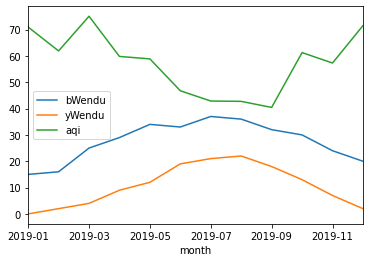

In [15]:
group_data.plot()